# Exemple de Classification Ascendante Hiérarchique

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # Chargement des données Iris
from sklearn.preprocessing import StandardScaler # Normalisation des données
from sklearn.metrics import accuracy_score # Calcul du score de bonnes réponses
from scipy.spatial.distance import pdist # Fonction scipy de création de la CAH de calcul des distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # Fonction scipy de création de la CAH
import matplotlib.pyplot as plt # Visualisation

np.set_printoptions(precision=3,suppress=True, threshold=5) # 3 décimales, pas de notation scientifique, affichage de 5 lignes
print(f"Numpy {np.__version__}, Pandas {pd.__version__}")

Numpy 2.0.0, Pandas 2.2.2


## Chargement et normalisation des données Iris

In [2]:
# Charger le dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 ...
 [ 0.796 -0.132  0.82   1.054]
 [ 0.432  0.789  0.933  1.449]
 [ 0.069 -0.132  0.763  0.791]]


## Calcul de la matrice de liaison pour la CAH
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

In [3]:
Z = linkage(X_scaled,metric='euclidean', method='ward')
df_linkage = pd.DataFrame(Z, columns=['Noeud 1','Noeud 2','distance','nombre d\'exemple'])
df_linkage[['Noeud 1','Noeud 2','nombre d\'exemple']] = df_linkage[['Noeud 1','Noeud 2','nombre d\'exemple']].astype(int)
df_linkage.to_excel('df_linkage.xlsx',index=False)

## Affichage du dentogramme

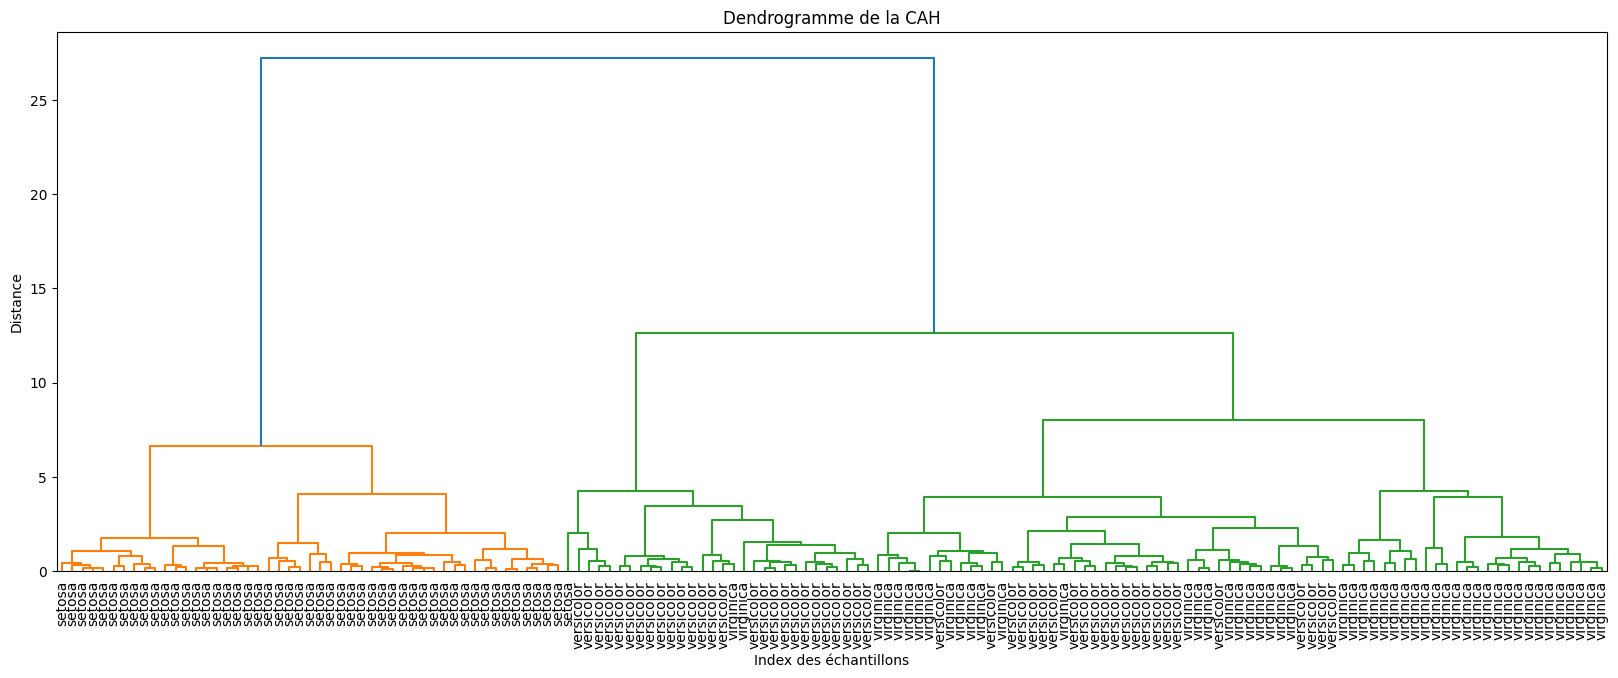

In [4]:
plt.figure(figsize=(20, 7))
dendrogram(Z, labels=iris.target_names[y], leaf_font_size=10)
plt.title("Dendrogramme de la CAH")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()

### Limiter l'affichage de l'arbre

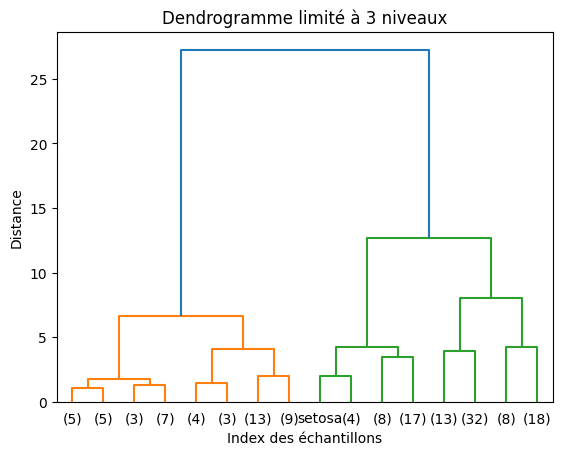

In [5]:
dendrogram(Z, labels=iris.target_names[y], leaf_font_size=10, truncate_mode="level", p=3)
plt.title("Dendrogramme limité à 3 niveaux")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()

## Nombre optimal de cluster

[0, np.float64(0.34776825565331204), np.float64(0.5090419182564341), np.float64(0.6111999379935671), np.float64(0.6955300225152805), np.float64(0.7496861382957448), np.float64(0.8036322929712958), np.float64(0.8554638436565313), np.float64(0.9058842771468528), np.float64(0.9560737000802729)]


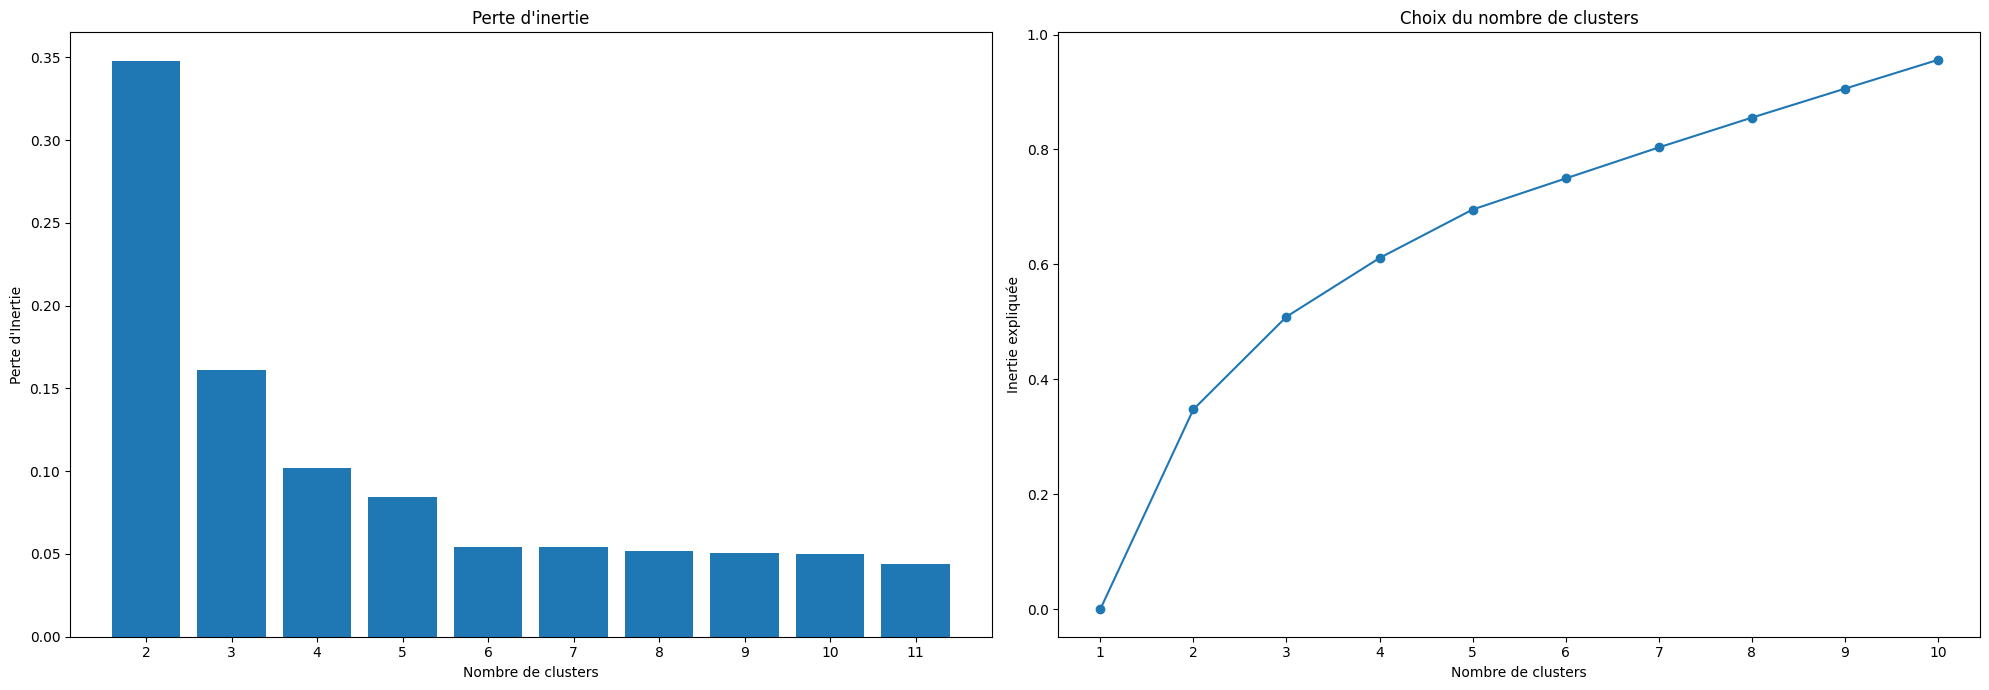

In [6]:
# Afficher le diagramme de croissance de l'inertie (distance de fusion) divisée par l'inertie totale
total_inertia = Z[-10:, 2].sum()
last = Z[-10:, 2]
inertia_loss = np.flip(last, 0)/total_inertia
# print(inertia_loss)
explained_inertia = [0]
for nb_cluster in range(2,11):
    explained_inertia += [explained_inertia[-1] + inertia_loss[nb_cluster-2]]
print(explained_inertia)
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  # 1 ligne, 2 colonnes

axs[0].bar(range(2,len(inertia_loss)+2), inertia_loss)
axs[0].set_title("Perte d'inertie")
axs[0].set_xlabel("Nombre de clusters")
axs[0].set_xticks(range(2, 12, 1))
axs[0].set_ylabel("Perte d'Inertie")

# Deuxième graphique : plot pour l'inertie expliquée
axs[1].plot(range(1,len(explained_inertia)+1), explained_inertia, marker='o')
axs[1].set_title("Choix du nombre de clusters")
axs[1].set_xlabel("Nombre de clusters")
axs[1].set_xticks(range(1, 11, 1))
axs[1].set_ylabel("Inertie expliquée")

# Affichage des deux graphiques
plt.tight_layout()  # Pour ajuster l'espacement entre les sous-graphiques
plt.show()


## Division en 3 clusters

In [7]:
# Diviser les données en 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')

# Afficher les clusters
print(f"Clusters assignés pour chaque échantillon : {clusters}. Précision: {round(accuracy_score(y+1,clusters)*100,1)}%")


Clusters assignés pour chaque échantillon : [1 1 1 ... 3 3 3]. Précision: 82.7%


### Méthode Single

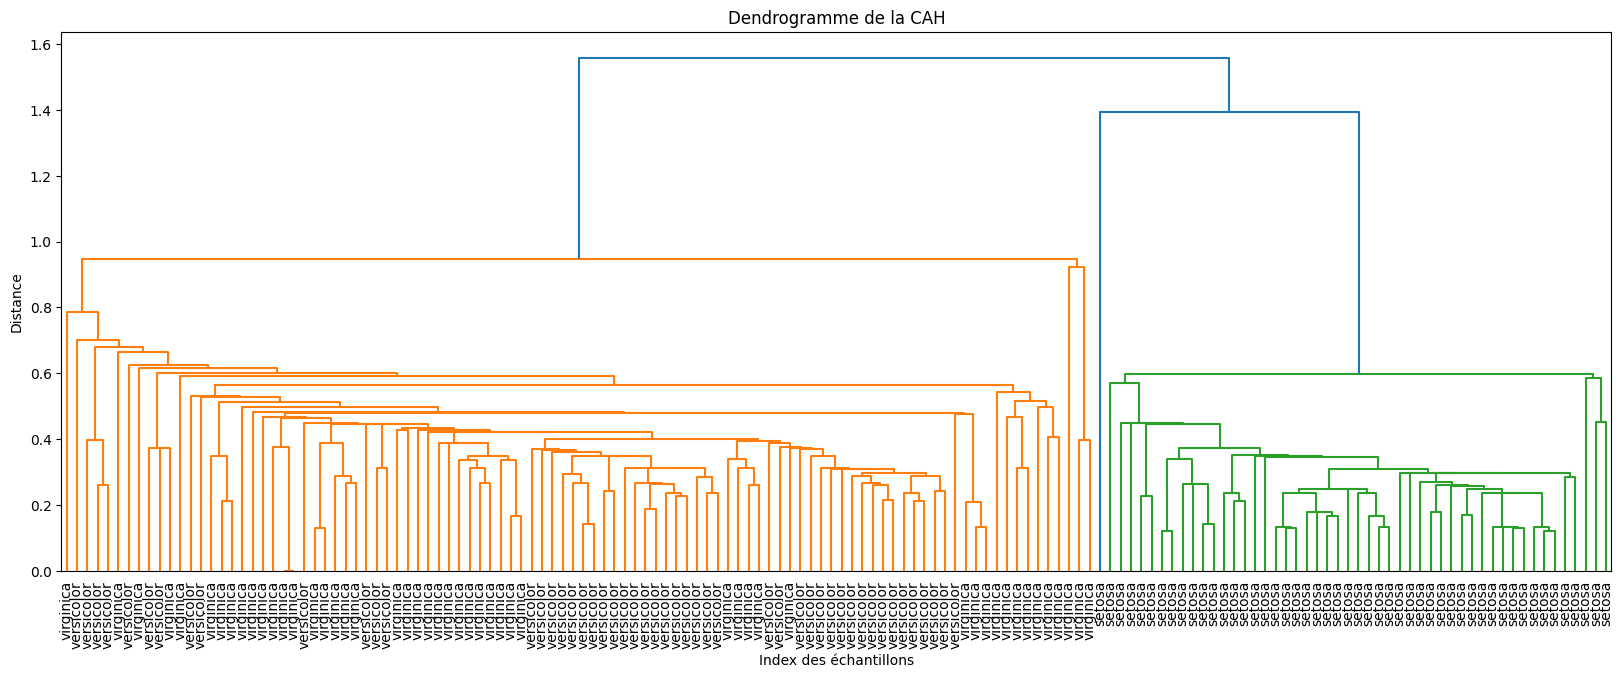

In [8]:
plt.figure(figsize=(20, 7))
Z = linkage(X_scaled,metric='euclidean', method='single')
dendrogram(Z, labels=iris.target_names[y], leaf_font_size=10)
plt.title("Dendrogramme de la CAH")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()

### Distance non euclidienne
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

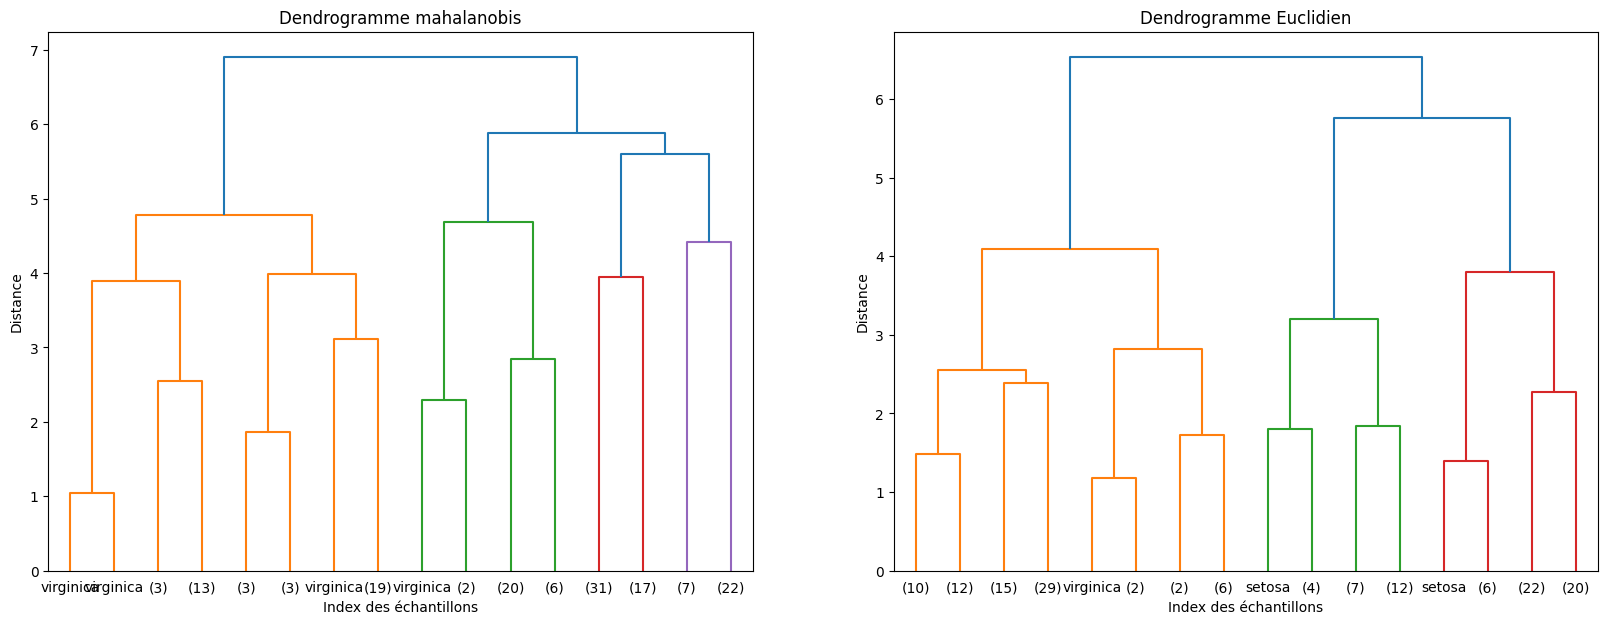

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  # 1 ligne, 2 colonnes
type_distance = np.random.choice(['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
                  'hamming', 'jaccard','mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean'
            ])
# ignoré : 'dice','jensenshannon','kulczynski1', 'sokalsneath', 'sokalmichener','rogerstanimoto', 'russellrao', 'yule'

Z_c = linkage(X_scaled,metric=type_distance, method='complete')
dendrogram(Z_c, labels=iris.target_names[y], leaf_font_size=10, truncate_mode="level", p=3, ax=axs[0])
axs[0].set_title("Dendrogramme " + type_distance)
axs[0].set_xlabel("Index des échantillons")
axs[0].set_ylabel("Distance")

Z_e = linkage(X_scaled,metric='euclidean', method='complete')
dendrogram(Z_e, labels=iris.target_names[y], leaf_font_size=10, truncate_mode="level", p=3, ax=axs[1])
axs[1].set_title("Dendrogramme Euclidien")
axs[1].set_xlabel("Index des échantillons")
axs[1].set_ylabel("Distance")

plt.show()